In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [26]:
# This is to suppress a warning below

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

##### The .csv file passes git file limit. The csv can be found on https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [27]:
titanic = pd.read_csv("Titanic-Dataset.csv")

In [28]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
# I remove passenger id and name since they are unique identifiers of entities
# I remove ticket since the ticket number has very many unique values
titanic.drop(columns=["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

In [31]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [32]:
# Type conversion
titanic["Pclass"] = titanic["Pclass"].astype("object")
# Converting all object types to category types
for column in titanic.select_dtypes(include="object"):
    titanic[column] = titanic[column].astype("category")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Cabin     204 non-null    category
 8   Embarked  889 non-null    category
dtypes: category(4), float64(2), int64(3)
memory usage: 44.9 KB


In [33]:
# Check if there are null values
titanic.isnull().sum() / len(titanic)

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

#### Cabin has too many null values

In [34]:
# Look for column that has too many null values and drop it
threshold = 0.5 * len(titanic) # threshold here is 50 percent

titanic.dropna(thresh=threshold, axis=1, inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  889 non-null    category
dtypes: category(3), float64(2), int64(3)
memory usage: 37.9 KB


##### Cabin is dropped since it has too many null values, even imputation will be hard to do.

In [35]:
# Encoding categorical variables, this will allow for things like imputation on categorical values

# Encoding and storing values
for column in titanic.select_dtypes(include="category").columns:
    column_encoded = f"{column}_encoded"
    # This is to allow holding of null values too
    titanic[column_encoded] = titanic[column].cat.codes.astype("Int64") #  To allow null values
    titanic[column_encoded].replace(-1, pd.NA, inplace=True) # To replace -1 with null for imputation
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Survived          891 non-null    int64   
 1   Pclass            891 non-null    category
 2   Sex               891 non-null    category
 3   Age               714 non-null    float64 
 4   SibSp             891 non-null    int64   
 5   Parch             891 non-null    int64   
 6   Fare              891 non-null    float64 
 7   Embarked          889 non-null    category
 8   Pclass_encoded    891 non-null    Int64   
 9   Sex_encoded       891 non-null    Int64   
 10  Embarked_encoded  889 non-null    Int64   
dtypes: Int64(3), category(3), float64(2), int64(3)
memory usage: 61.4 KB


In [36]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Remove categorical values for imputation
titanic_for_eda = titanic.copy()

# Excluding category since they are categories
# Exclusing object since it is the category that has null values
titanic = titanic.select_dtypes(exclude=["category"])

imputer = IterativeImputer()
imputed_values = imputer.fit_transform(titanic)
titanic.loc[:,:] = imputed_values

# Replace with imputed columns for EDA purposes
for column in titanic.columns:
    titanic_for_eda[column] = titanic[column]

# Adding category values for imputed columns
for column in titanic_for_eda.select_dtypes(include=["category"]).columns:
    column_encoded = f"{column}_encoded"

    titanic_for_eda[column] = titanic_for_eda[column_encoded].apply(
        lambda x: titanic_for_eda[column].cat.categories[int(x)]
        )
    
    # Return the type to category since they are being changed to object
    titanic_for_eda[column] = titanic_for_eda[column].astype("category")

titanic_for_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Survived          891 non-null    int64   
 1   Pclass            891 non-null    category
 2   Sex               891 non-null    category
 3   Age               891 non-null    float64 
 4   SibSp             891 non-null    int64   
 5   Parch             891 non-null    int64   
 6   Fare              891 non-null    float64 
 7   Embarked          891 non-null    category
 8   Pclass_encoded    891 non-null    Int64   
 9   Sex_encoded       891 non-null    Int64   
 10  Embarked_encoded  891 non-null    float64 
dtypes: Int64(2), category(3), float64(3), int64(3)
memory usage: 60.5 KB


In [37]:
# Know the proportions of the feature class
titanic["Survived"].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

##### A mild imbalance. No downsampling shall be done.

In [38]:
titanic_for_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Survived          891 non-null    int64   
 1   Pclass            891 non-null    category
 2   Sex               891 non-null    category
 3   Age               891 non-null    float64 
 4   SibSp             891 non-null    int64   
 5   Parch             891 non-null    int64   
 6   Fare              891 non-null    float64 
 7   Embarked          891 non-null    category
 8   Pclass_encoded    891 non-null    Int64   
 9   Sex_encoded       891 non-null    Int64   
 10  Embarked_encoded  891 non-null    float64 
dtypes: Int64(2), category(3), float64(3), int64(3)
memory usage: 60.5 KB


Categorical Column: Pclass

Category Ratio:  Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

Survived  Pclass
0         1         0.37
          2         0.53
          3         0.76
1         1         0.63
          2         0.47
          3         0.24
Name: Age, dtype: float64


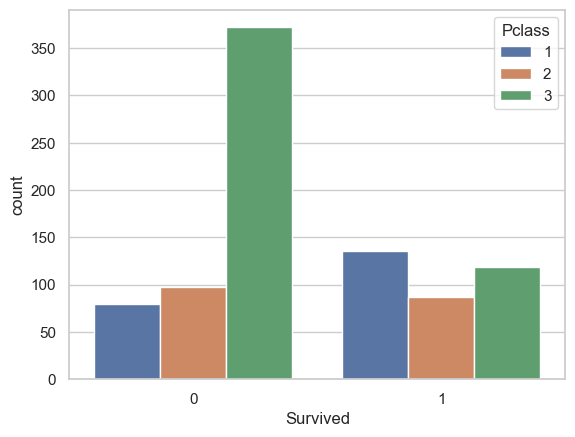

Categorical Column: Sex

Category Ratio:  Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

Survived  Sex   
0         female    0.26
          male      0.81
1         female    0.74
          male      0.19
Name: Age, dtype: float64


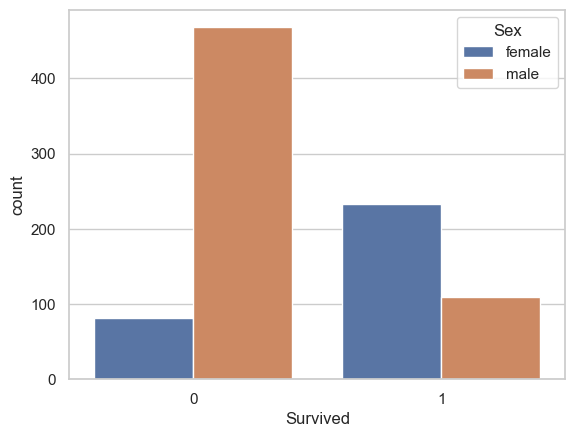

Categorical Column: Embarked

Category Ratio:  Embarked
S    0.722783
C    0.188552
Q    0.088664
Name: proportion, dtype: float64

Survived  Embarked
0         C           0.45
          Q           0.59
          S           0.66
1         C           0.55
          Q           0.41
          S           0.34
Name: Age, dtype: float64


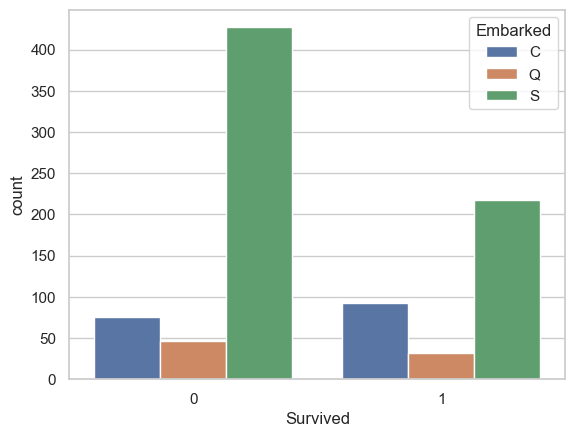

In [39]:
# Looking at how categorical values are split in the classes
for column in titanic_for_eda.select_dtypes(include=["category"]).columns:
    print("Categorical Column:",column)
    print("")
    print("Category Ratio: ",titanic_for_eda[column].value_counts(normalize=True))
    print("")
    grouping_order = ["Survived",column]

    group_by_column = titanic_for_eda.groupby([column])["Age"]
    group_by_column_and_class = titanic_for_eda.groupby(grouping_order)["Age"]
    
    category_to_class_ratio = group_by_column_and_class.count() / group_by_column.count()
    
    print(category_to_class_ratio.round(2))
    
    sns.countplot(x=titanic_for_eda[grouping_order[0]], hue=titanic_for_eda[grouping_order[1]])
    plt.show()

#### For the sex, we can see males did not survive even though they were the majority
#### For Pclass, we can see that even though Pclass 3 has the largest ratio, it doesnt have the largest survivors

In [40]:
titanic.describe()

,Survived,Age,SibSp,Parch,Fare,Pclass_encoded,Sex_encoded,Embarked_encoded
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.0,891.0,891.000000
mean,0.383838,29.269499,0.523008,0.381594,32.204208,1.308642,0.647587,1.534815
std,0.486592,13.701914,1.102743,0.806057,49.693429,0.836071,0.47799,0.791306
min,0.000000,-4.915922,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.000000,21.000000,0.000000,0.000000,7.910400,1.0,0.0,1.000000
50%,0.000000,28.603240,0.000000,0.000000,14.454200,2.0,1.0,2.000000
75%,1.000000,36.518960,1.000000,0.000000,31.000000,2.0,1.0,2.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,2.0,1.0,2.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          891 non-null    int64  
 1   Age               891 non-null    float64
 2   SibSp             891 non-null    int64  
 3   Parch             891 non-null    int64  
 4   Fare              891 non-null    float64
 5   Pclass_encoded    891 non-null    Int64  
 6   Sex_encoded       891 non-null    Int64  
 7   Embarked_encoded  891 non-null    float64
dtypes: Int64(2), float64(3), int64(3)
memory usage: 57.6 KB
Age


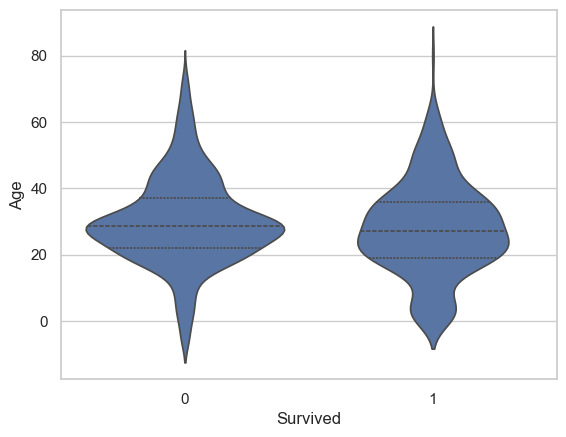

SibSp


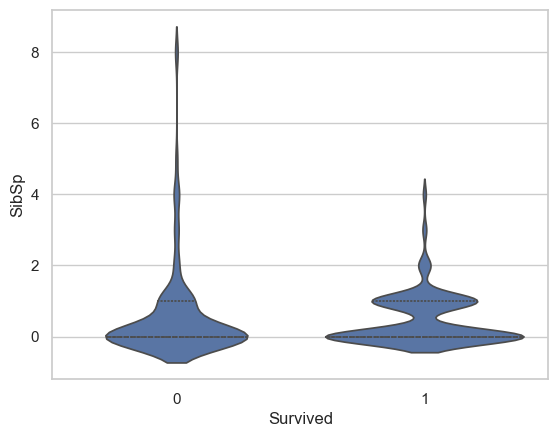

Parch


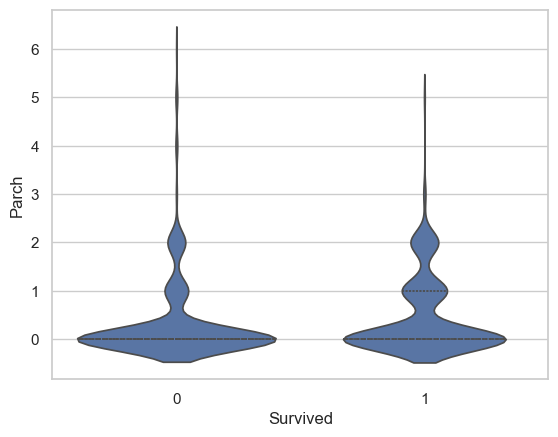

Fare


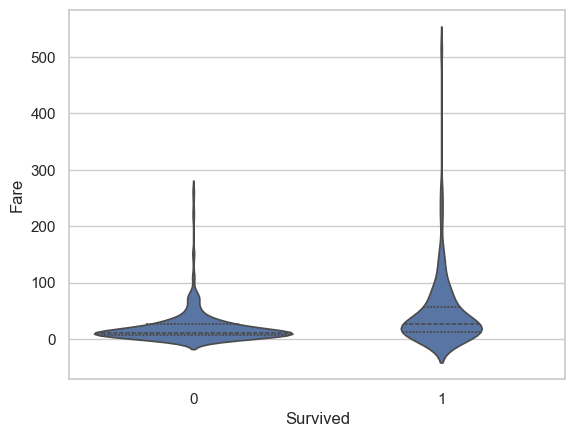

In [41]:
titanic.info()
for column in titanic.drop(columns=["Pclass_encoded", "Sex_encoded", "Embarked_encoded","Survived"], axis=1, inplace=False).columns:
    print(column)
    sns.violinplot(x=titanic["Survived"], y=titanic[column], inner="quartile")
    plt.show()

#### No striking insight from the numerical data

In [42]:
# Splitting training and testing data
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

titanic_fs = titanic.copy()

X_fs = titanic_fs.drop(["Survived"], axis=1)
y_fs = titanic_fs["Survived"]

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y_fs, test_size=0.7, shuffle=True, stratify=y_fs ,random_state=1)

k_best_f1_scores = []
k_best_best_features = []
rfe_f1_scores = []
rfe_best_features = []

k_best_rf = RandomForestClassifier(random_state=1)
rfe_rf = RandomForestClassifier(random_state=1)
rf = RandomForestClassifier(random_state=1)

for k in range(1, titanic_fs.shape[1]):
    # Creating feature selectors
    k_best_selector = SelectKBest(score_func=mutual_info_classif, k=k)
    k_best_selector.fit(X_train_fs, y_train_fs)

    rfe_selector = RFE(estimator=rfe_rf, n_features_to_select=k, step=1)
    rfe_selector.fit(X_train_fs, y_train_fs)

    # Feature masks
    k_best_feature_mask = k_best_selector.get_support()
    rfe_feature_mask = rfe_selector.get_support()

    # Apply feature selectors to data sets
    k_best_selected = {
        "X_train": k_best_selector.transform(X_train_fs),
        "X_test": k_best_selector.transform(X_test_fs)
    }

    rfe_selected = {
        "X_train": rfe_selector.transform(X_train_fs),
        "X_test": rfe_selector.transform(X_test_fs)
    }
    
    # Training models
    k_best_rf.fit(k_best_selected["X_train"], y_train_fs)
    rfe_rf.fit(rfe_selected["X_train"], y_train_fs)

   
    # Obtaining scores
    k_best_y_pred_fs = k_best_rf.predict(k_best_selected["X_test"])
    rfe_y_pred = rfe_rf.predict(rfe_selected["X_test"])

    k_best_f1_scores.append(round(f1_score(y_test_fs, k_best_y_pred_fs), 3))
    rfe_f1_scores.append(round(f1_score(y_test_fs, rfe_y_pred), 3))
    
    current_k_best_best_features = X_train_fs.columns[k_best_feature_mask].to_list()
    current_rfe_best_features = X_train_fs.columns[rfe_feature_mask].to_list()
    
    k_best_best_features.append(current_k_best_best_features)
    rfe_best_features.append(current_rfe_best_features)
    
    # rf.fit(X_train_fs, y_train_fs)

    # print(rf.feature_importances_)

    print("K Value:", k)
    print("==================")
    print("K Best:", current_k_best_best_features)
    print("RFE:", current_rfe_best_features)
    print("")

f1_score_df = pd.DataFrame({
    "k": np.arange(1, titanic_fs.shape[1]),
    "k_best": k_best_f1_scores,
    "k_best_features": str(k_best_best_features),
    "rfe": rfe_f1_scores,
    "rfe_best_features": str(rfe_best_features)
})

f1_score_df

K Value: 1
K Best: ['Fare']
RFE: ['Fare']

K Value: 2
K Best: ['Age', 'Fare']
RFE: ['Age', 'Fare']

K Value: 3
K Best: ['Age', 'Fare', 'Sex_encoded']
RFE: ['Age', 'Fare', 'Sex_encoded']

K Value: 4
K Best: ['Age', 'Fare', 'Pclass_encoded', 'Sex_encoded']
RFE: ['Age', 'Fare', 'Pclass_encoded', 'Sex_encoded']

K Value: 5
K Best: ['Age', 'SibSp', 'Fare', 'Pclass_encoded', 'Sex_encoded']
RFE: ['Age', 'SibSp', 'Fare', 'Pclass_encoded', 'Sex_encoded']

K Value: 6
K Best: ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_encoded', 'Sex_encoded']
RFE: ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_encoded', 'Sex_encoded']

K Value: 7
K Best: ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_encoded', 'Sex_encoded', 'Embarked_encoded']
RFE: ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_encoded', 'Sex_encoded', 'Embarked_encoded']



,k,k_best,k_best_features,rfe,rfe_best_features
0,1,0.546,"[['Fare'], ['Age', 'Fare'], ['Age', 'Fare', 'S...",0.546,"[['Fare'], ['Age', 'Fare'], ['Age', 'Fare', 'S..."
1,2,0.511,"[['Fare'], ['Age', 'Fare'], ['Age', 'Fare', 'S...",0.511,"[['Fare'], ['Age', 'Fare'], ['Age', 'Fare', 'S..."
2,3,0.703,"[['Fare'], ['Age', 'Fare'], ['Age', 'Fare', 'S...",0.703,"[['Fare'], ['Age', 'Fare'], ['Age', 'Fare', 'S..."
3,4,0.738,"[['Fare'], ['Age', 'Fare'], ['Age', 'Fare', 'S...",0.738,"[['Fare'], ['Age', 'Fare'], ['Age', 'Fare', 'S..."
4,5,0.739,"[['Fare'], ['Age', 'Fare'], ['Age', 'Fare', 'S...",0.739,"[['Fare'], ['Age', 'Fare'], ['Age', 'Fare', 'S..."
5,6,0.726,"[['Fare'], ['Age', 'Fare'], ['Age', 'Fare', 'S...",0.726,"[['Fare'], ['Age', 'Fare'], ['Age', 'Fare', 'S..."
6,7,0.730,"[['Fare'], ['Age', 'Fare'], ['Age', 'Fare', 'S...",0.730,"[['Fare'], ['Age', 'Fare'], ['Age', 'Fare', 'S..."


<Axes: xlabel='k', ylabel='k_best'>

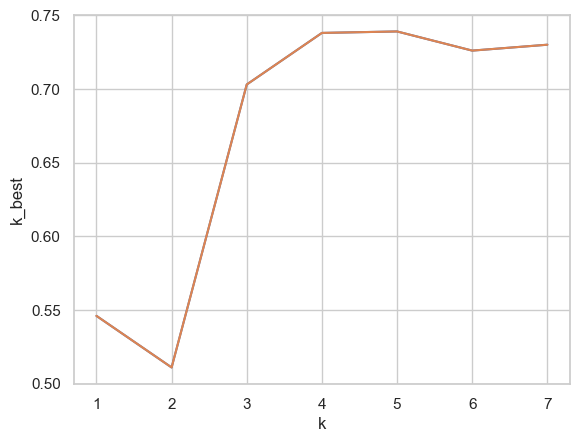

In [43]:
sns.lineplot(x=f1_score_df["k"], y=f1_score_df["k_best"])
sns.lineplot(x=f1_score_df["k"], y=f1_score_df["rfe"])

#### I shall use K = 4, since it is has the best performance with the least number.

In [44]:
f1_score_df

,k,k_best,k_best_features,rfe,rfe_best_features
0,1,0.546,"[['Fare'], ['Age', 'Fare'], ['Age', 'Fare', 'S...",0.546,"[['Fare'], ['Age', 'Fare'], ['Age', 'Fare', 'S..."
1,2,0.511,"[['Fare'], ['Age', 'Fare'], ['Age', 'Fare', 'S...",0.511,"[['Fare'], ['Age', 'Fare'], ['Age', 'Fare', 'S..."
2,3,0.703,"[['Fare'], ['Age', 'Fare'], ['Age', 'Fare', 'S...",0.703,"[['Fare'], ['Age', 'Fare'], ['Age', 'Fare', 'S..."
3,4,0.738,"[['Fare'], ['Age', 'Fare'], ['Age', 'Fare', 'S...",0.738,"[['Fare'], ['Age', 'Fare'], ['Age', 'Fare', 'S..."
4,5,0.739,"[['Fare'], ['Age', 'Fare'], ['Age', 'Fare', 'S...",0.739,"[['Fare'], ['Age', 'Fare'], ['Age', 'Fare', 'S..."
5,6,0.726,"[['Fare'], ['Age', 'Fare'], ['Age', 'Fare', 'S...",0.726,"[['Fare'], ['Age', 'Fare'], ['Age', 'Fare', 'S..."
6,7,0.730,"[['Fare'], ['Age', 'Fare'], ['Age', 'Fare', 'S...",0.730,"[['Fare'], ['Age', 'Fare'], ['Age', 'Fare', 'S..."


In [45]:
import ast
# Selecting features dynamically
best_k = 4

row_select = f1_score_df["k"] == best_k

features_string = f1_score_df.loc[row_select]["k_best_features"].iloc[0]

features_list = ast.literal_eval(features_string)

relevant_columns = features_list[best_k - 1]

relevant_columns.append("Survived")

titanic = titanic[relevant_columns]

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             891 non-null    float64
 1   Fare            891 non-null    float64
 2   Pclass_encoded  891 non-null    Int64  
 3   Sex_encoded     891 non-null    Int64  
 4   Survived        891 non-null    int64  
dtypes: Int64(2), float64(2), int64(1)
memory usage: 36.7 KB


In [46]:
from sklearn.model_selection import train_test_split
X = titanic.drop(columns=["Survived"], axis=1, inplace=False)

y = titanic["Survived"]

# Splitting  train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, shuffle=True, stratify=y, random_state=1)

In [47]:
# Hyperparameter finetuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

parameters =  {
    'n_estimators': randint(50, 500),
    'max_depth': randint(1, 20)
    }

random_search = RandomizedSearchCV(
    rf,
    param_distributions=parameters,
    n_iter=10,
    cv=5
)

random_search.fit(X_train, y_train)

parameters = random_search.best_params_

In [ ]:
# Final Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=parameters["n_estimators"], max_depth=parameters["max_depth"], random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.782051282051282
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       384
           1       0.71      0.72      0.72       240

    accuracy                           0.78       624
   macro avg       0.77      0.77      0.77       624
weighted avg       0.78      0.78      0.78       624

